In [ ]:
import torch
torch.__version__

'2.3.1+cu121'

In [ ]:
#device agnoistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplot
import matplotlib.pyplot as plt

In [ ]:
import requests
import zipfile
from pathlib import Path

#setup path for the data
data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"

#if image folder doesn't exist download it and prepare it....
if image_path.is_dir():
  print(f"{image_path} directory alredy exist ...ship download")
else:
  print(f"{image_path} doesn't exist create one... ")
  image_path.mkdir(parents=True,exist_ok=True)

data/pizza_steak_sushi doesn't exist create one... 


In [ ]:
#download pizza,steak,sushi data...
with open(data_path/"pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print(f"downloading pizza steak sushi data...")
  f.write(request.content)


downloading pizza steak sushi data...


In [ ]:
#unzip the pizza_steak_sushi...
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
  print(f"unzipping pizza steak sushi data...")
  zip_ref.extractall(image_path)

unzipping pizza steak sushi data...


In [ ]:
#data preparation and data exploration
import os
def walk_through_dir(dir_path):
  """ walks through dir_path returns its content"""
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")
walk_through_dir(image_path)

there are 2 directories and 0 images in data/pizza_steak_sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/train
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
there are 3 directories and 0 images in data/pizza_steak_sushi/test
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza


In [ ]:
#setup train and test path
train_dir = image_path/"train"
test_dir = image_path/"test"
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

random image path : data/pizza_steak_sushi/train/steak/1624747.jpg
image class :steak
height of image :341
width of image :512


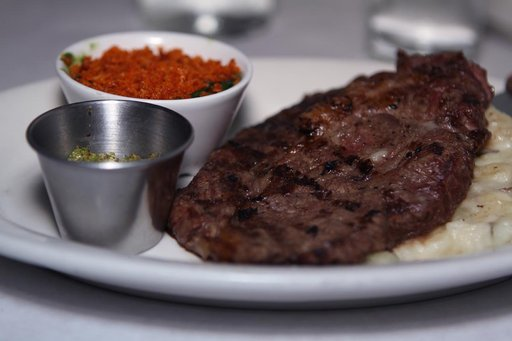

In [ ]:
#visualize the immage
import random
from PIL import Image

#set seed
random.seed(42)

#1.get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

#2.pick random imager path
random_image_path = random.choice(image_path_list)

#3.get the class name
image_class = random_image_path.parent.stem

#4.open image
img = Image.open(random_image_path)

#5.print meta data
print(f"random image path : {random_image_path}")
print(f"image class :{image_class}")
print(f"height of image :{img.height}")
print(f"width of image :{img.width}")
img

(-0.5, 511.5, 340.5, -0.5)

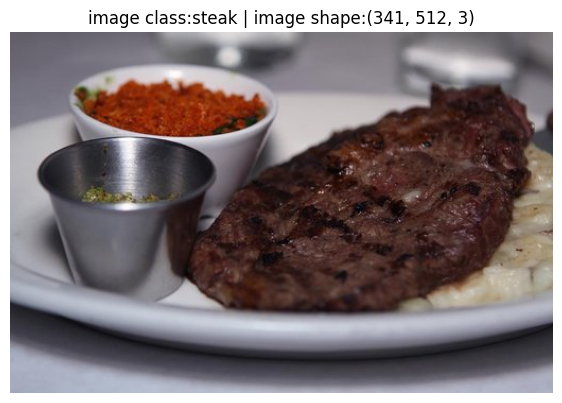

In [ ]:
#plot in matplotlib
import numpy as np
import matplotlib.pyplot as plt

#turn the image to array
img_as_array = np.asarray(img)

#plot image
plt.figure(figsize=(7,7))
plt.imshow(img_as_array)
plt.title(f"image class:{image_class} | image shape:{img_as_array.shape}")
plt.axis("off")

In [ ]:
#transgorming data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

#write a transform for an image
data_transform = transforms.Compose([
    #resize our images to 64*64
    transforms.Resize(size=(64,64)),
    #flip the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    #turn the data to tensors
    transforms.ToTensor()
])

data_transform(img)

tensor([[[0.4980, 0.4784, 0.4510,  ..., 0.3843, 0.3804, 0.3843],
         [0.5020, 0.4863, 0.4549,  ..., 0.3922, 0.3882, 0.3882],
         [0.5059, 0.4863, 0.4392,  ..., 0.4000, 0.3961, 0.3961],
         ...,
         [0.6706, 0.6706, 0.6627,  ..., 0.6588, 0.6549, 0.6549],
         [0.6627, 0.6745, 0.6784,  ..., 0.6549, 0.6471, 0.6510],
         [0.6745, 0.6784, 0.6745,  ..., 0.6471, 0.6431, 0.6392]],

        [[0.4824, 0.4627, 0.4314,  ..., 0.3725, 0.3686, 0.3725],
         [0.4824, 0.4667, 0.4353,  ..., 0.3804, 0.3765, 0.3765],
         [0.4863, 0.4667, 0.4196,  ..., 0.3882, 0.3843, 0.3843],
         ...,
         [0.6784, 0.6824, 0.6667,  ..., 0.6784, 0.6745, 0.6745],
         [0.6745, 0.6863, 0.6784,  ..., 0.6784, 0.6706, 0.6706],
         [0.6863, 0.6863, 0.6784,  ..., 0.6745, 0.6667, 0.6667]],

        [[0.4863, 0.4667, 0.4471,  ..., 0.4118, 0.4078, 0.4078],
         [0.4941, 0.4784, 0.4510,  ..., 0.4235, 0.4157, 0.4157],
         [0.5059, 0.4863, 0.4353,  ..., 0.4314, 0.4275, 0.

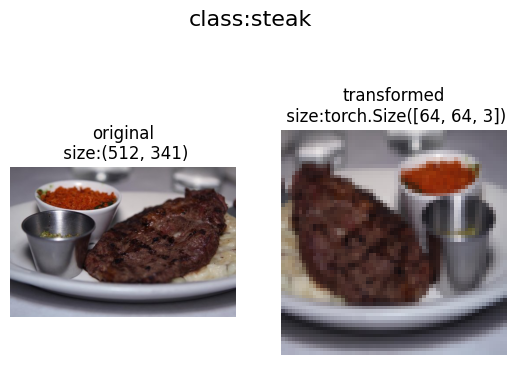

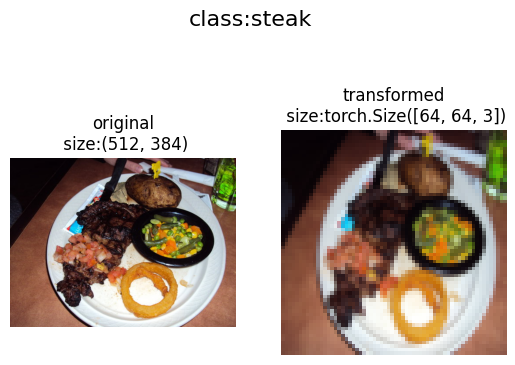

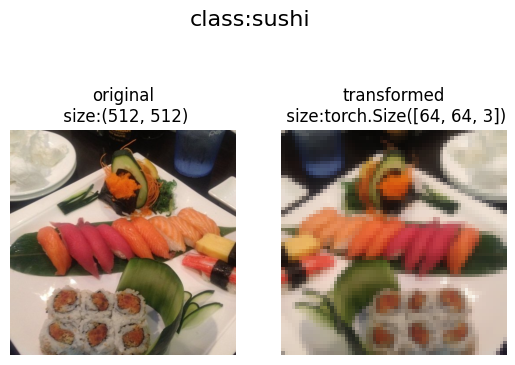

In [ ]:
#transform for some images
def plot_transformed_images(image_paths:list,transform,n=3,seed=None):
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"original\n size:{f.size}")
      ax[0].axis("off")

      #transform and plot target images
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"transformed\n size:{transformed_image.shape}")
      ax[1].axis("off")
      fig.suptitle(f"class:{image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform = data_transform,
                        n=3,
                        seed=42)

In [ ]:
#Load image data using ImageFolder
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root = test_dir,
                                 transform=data_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
#get class names as list
class_names = train_data.classes
print(class_names)

#get class names as dict
class_dict = train_data.class_to_idx
print(class_dict)

len(train_data),len(test_data)

['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}


(225, 75)

In [ ]:
#visualize an sample from train_data

#index on train_data datasets to get an image nd label
img,label = train_data[0][0],train_data[0][1]
print(f"image tensor:\n {img}")
print(f"image shape:{img.shape}")
print(f"image datatype:{img.dtype}")
print(f"image label:{label}")
print(f"label datatype:{type(label)}")

image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

In [ ]:
#rearrange the order dimensions
img_permute = img.permute(1,2,0)
img_permute.shape

torch.Size([64, 64, 3])

In [ ]:
print(f"original shape:{img.shape}")
print(f"image permute shape:{img_permute.shape}")

original shape:torch.Size([3, 64, 64])
image permute shape:torch.Size([64, 64, 3])


(-0.5, 63.5, 63.5, -0.5)

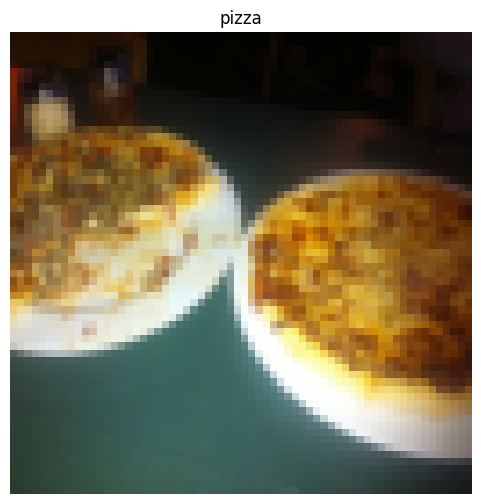

In [ ]:
#plot the image
plt.figure(figsize=(6,6))
plt.imshow(img_permute)
plt.title(class_names[label])
plt.axis("off")

In [ ]:
#turn datasets to dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bac1a2dfa60>,
 <torch.utils.data.dataloader.DataLoader at 0x7bac1a24f910>)

In [ ]:
img,label = next(iter(train_dataloader))
print(f"image shape:{img.shape}")
print(f"label shape{label.shape}")

image shape:torch.Size([1, 3, 64, 64])
label shapetorch.Size([1])


## model 0..tinyVGG without data augmentation

In [ ]:
#transform and load data for model0
#transform data
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])
#load the data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = simple_transform)

In [ ]:
#create TinyVGG model class
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)

    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)

        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,#pass dummy to check this
                  out_features = output_shape)
    )
  #forward pass
  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x


In [ ]:
#instance for our model
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape = len(class_names))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=3, bias=True)
  )
)

In [ ]:
#dummy pass
image_batch,label_batch = next(iter(train_dataloader))
image_batch.shape,label_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [ ]:
model_0(image_batch)

tensor([[ 0.0078,  0.0349, -0.0013]], grad_fn=<AddmmBackward0>)

In [ ]:
#create train and test functions for model0
#train_step()
#test_step()

In [ ]:
#train step()
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  #put model in train mode
  model.train()
  #setup train loss & train acc
  train_loss,train_acc=0,0
  #loop through data loader data batches
  for batch,(X,y) in enumerate(dataloader):
    #send data to target device
    X,y = X.to(device),y.to(device)
    #forward pass
    y_pred = model(X)
    #loss
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()
    #optimizer zero grad
    optimizer.zero_grad()
    #loss backward
    loss.backward()
    optimizer.step()
    #acc
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class ==y).sum().item() / len(y_pred)
  #adjust the metrices
  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss,train_acc

In [ ]:
#test step()
def test_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               device=device):
  model.eval()
  test_loss,test_acc = 0,0
  with torch.inference_mode():
    #loop through dataloader batches
    for batch,(X,y) in enumerate(dataloader):
      X,y = X.to(device),y.to(device)
      test_pred_logits = model(X)
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)#acc
      test_acc = ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss,test_acc


In [ ]:
#train() function to combine train step and test step
from tqdm.auto import tqdm
#create tran function
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
          epochs:int=5,
          device=device):
  #create empty results dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
  #loop through training & testing steps for a number of epochs
  for epochs in tqdm(range(epochs)):
    train_loss,train_acc = train_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)
    test_loss,test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    #print whats happening...
    print(f"Epoch:{epochs} | train loss:{train_loss:.4f} | train acc:{train_acc:.4f} | test_loss:{test_loss:.4f} | test_acc:{test_acc:.4f}")

    #update results dictionaries
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results


In [ ]:
#train and eval model0
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.001)

#start timer
from timeit import default_timer as timer
start_timer= timer()

model_0_results = train(model=model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = 5)
#end timer and calculate it
end_timer = timer()
print(f"total training time:{end_timer-start_timer:.3f}seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | train loss:1.1048 | train acc:0.3067 | test_loss:1.1025 | test_acc:0.0000
Epoch:1 | train loss:1.0415 | train acc:0.4978 | test_loss:1.0280 | test_acc:0.0000
Epoch:2 | train loss:0.9815 | train acc:0.5467 | test_loss:0.9754 | test_acc:0.0000
Epoch:3 | train loss:0.9322 | train acc:0.5822 | test_loss:1.0258 | test_acc:0.0000
Epoch:4 | train loss:0.9076 | train acc:0.5822 | test_loss:0.9719 | test_acc:0.0000
total training time:24.225seconds


In [ ]:
#train and eval model0
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.001)

#start timer
from timeit import default_timer as timer
start_timer= timer()

model_0_results = train(model=model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = 20)
#end timer and calculate it
end_timer = timer()
print(f"total training time:{end_timer-start_timer:.3f}seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch:0 | train loss:0.8729 | train acc:0.6489 | test_loss:0.9927 | test_acc:0.0000
Epoch:1 | train loss:0.8157 | train acc:0.6444 | test_loss:1.0695 | test_acc:0.0000
Epoch:2 | train loss:0.7887 | train acc:0.6489 | test_loss:1.0265 | test_acc:0.0000
Epoch:3 | train loss:0.7657 | train acc:0.6844 | test_loss:1.0930 | test_acc:0.0000
Epoch:4 | train loss:0.7008 | train acc:0.6800 | test_loss:1.0762 | test_acc:0.0000
Epoch:5 | train loss:0.6610 | train acc:0.7022 | test_loss:1.0843 | test_acc:0.0133
Epoch:6 | train loss:0.5183 | train acc:0.7911 | test_loss:1.4633 | test_acc:0.0000
Epoch:7 | train loss:0.5276 | train acc:0.7911 | test_loss:1.5231 | test_acc:0.0000
Epoch:8 | train loss:0.5041 | train acc:0.8178 | test_loss:1.5924 | test_acc:0.0000
Epoch:9 | train loss:0.3894 | train acc:0.8889 | test_loss:1.5036 | test_acc:0.0000
Epoch:10 | train loss:0.3766 | train acc:0.8622 | test_loss:1.6580 | test_acc:0.0000
Epoch:11 | train loss:0.3245 | train acc:0.8978 | test_loss:1.9257 | test_a

In [ ]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [ ]:
# See how many images we have
walk_through_dir(image_path)

there are 2 directories and 0 images in data/pizza_steak_sushi_20_percent
there are 3 directories and 0 images in data/pizza_steak_sushi_20_percent/train
there are 0 directories and 146 images in data/pizza_steak_sushi_20_percent/train/steak
there are 0 directories and 150 images in data/pizza_steak_sushi_20_percent/train/sushi
there are 0 directories and 154 images in data/pizza_steak_sushi_20_percent/train/pizza
there are 3 directories and 0 images in data/pizza_steak_sushi_20_percent/test
there are 0 directories and 58 images in data/pizza_steak_sushi_20_percent/test/steak
there are 0 directories and 46 images in data/pizza_steak_sushi_20_percent/test/sushi
there are 0 directories and 46 images in data/pizza_steak_sushi_20_percent/test/pizza


In [ ]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path



(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [ ]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()])

In [ ]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
from torchvision import datasets
train_data_20_percent = datasets.ImageFolder(root = train_data_20_percent_path,
                                             transform = train_transform_trivial_augment,
                                             target_transform = None)
test_data_20_percent = datasets.ImageFolder(root = test_data_20_percent_path,
                                            transform = test_transform)
train_data_20_percent,test_data_20_percent

# Create dataloaders
from torch.utils.data import DataLoader
train_data_20_dataloader = DataLoader(dataset = train_data_20_percent,
                                      batch_size=1,
                                      num_workers=1,
                                      shuffle=True)
test_data_20_dataloader = DataLoader(dataset = test_data_20_percent,
                                     batch_size=1,
                                     num_workers=1,
                                     shuffle=False)
train_data_20_dataloader,test_data_20_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bac1a2b13c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bacf64a3e50>)

In [ ]:
#create TinyVGG model class
class TinyVGGV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)

    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)

        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,#pass dummy to check this
                  out_features = output_shape)
    )
  #forward pass
  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [ ]:
#instance for our model
torch.manual_seed(42)
model_1 = TinyVGGV0(input_shape=3,
                  hidden_units=20,
                  output_shape = len(class_names))
model_1

TinyVGGV0(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=3, bias=True)
  )
)

In [ ]:
#dummy pass
image_batch_20,label_batch_20 = next(iter(train_data_20_dataloader))
image_batch.shape,label_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [ ]:
model_1(image_batch_20)

tensor([[ 0.0075,  0.0363, -0.0003]], grad_fn=<AddmmBackward0>)

In [ ]:
#train() function to combine train step and test step
from tqdm.auto import tqdm
#create tran function
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
          epochs:int=5,
          device=device):
  #create empty results dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
  #loop through training & testing steps for a number of epochs
  for epochs in tqdm(range(epochs)):
    train_loss,train_acc = train_step(model=model,
                                      dataloader=train_data_20_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)
    test_loss,test_acc = test_step(model=model,
                                    dataloader=test_data_20_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    #print whats happening...
    print(f"Epoch:{epochs} | train loss:{train_loss:.4f} | train acc:{train_acc:.4f} | test_loss:{test_loss:.4f} | test_acc:{test_acc:.4f}")

    #update results dictionaries
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results


In [ ]:
#train and eval model0
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),lr=0.001)

#start timer
from timeit import default_timer as timer
start_timer_20= timer()

model_1_results = train(model=model_1,
                        train_dataloader = train_data_20_dataloader,
                        test_dataloader = test_data_20_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = 20)
#end timer and calculate it
end_timer_20 = timer()
print(f"total training time:{end_timer_20-start_timer_20:.3f}seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch:0 | train loss:1.1015 | train acc:0.3667 | test_loss:1.0707 | test_acc:0.0067
Epoch:1 | train loss:1.0710 | train acc:0.4578 | test_loss:1.0406 | test_acc:0.0067
Epoch:2 | train loss:1.0135 | train acc:0.4778 | test_loss:0.9219 | test_acc:0.0067
Epoch:3 | train loss:0.9985 | train acc:0.4711 | test_loss:0.9189 | test_acc:0.0067
Epoch:4 | train loss:0.9807 | train acc:0.5556 | test_loss:0.8911 | test_acc:0.0067
Epoch:5 | train loss:0.9626 | train acc:0.5222 | test_loss:0.8659 | test_acc:0.0067
Epoch:6 | train loss:0.9709 | train acc:0.5111 | test_loss:0.8581 | test_acc:0.0067
Epoch:7 | train loss:0.9533 | train acc:0.5378 | test_loss:0.8277 | test_acc:0.0067
Epoch:8 | train loss:0.9102 | train acc:0.5756 | test_loss:0.9467 | test_acc:0.0067
Epoch:9 | train loss:1.0030 | train acc:0.5267 | test_loss:0.8563 | test_acc:0.0067
Epoch:10 | train loss:0.9495 | train acc:0.5600 | test_loss:0.8255 | test_acc:0.0067
Epoch:11 | train loss:0.8942 | train acc:0.5844 | test_loss:0.8428 | test_a

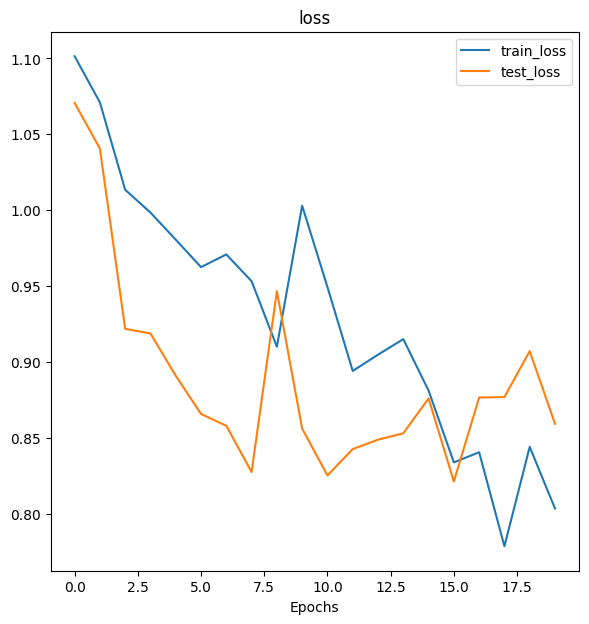

In [ ]:
#plot the loss function

#get the model key results
model_1_results.keys()

def plot_loss_curves(results:dict[str,list[float]]):
  #get the loss values
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  #figure out how many epochs there were
  epochs = range(len(results["train_loss"]))
  #setup plot
  plt.figure(figsize=(15,7))
  #plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label="train_loss")
  plt.plot(epochs,test_loss,label="test_loss")
  plt.title("loss")
  plt.xlabel("Epochs")
  plt.legend()
plot_loss_curves(model_1_results)

In [ ]:
#making prediction on custom image

#download custom image
import requests

#setup custom image path
custom_image_path = data_path/"04-pizza-dad.jpeg"

#download the image if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f:
    #when downloading from github....data should be raw
    requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg?raw=true")
    print(f"downloading {custom_image_path}...")
    f.write(requests.content)
else:
  print(f"{custom_image_path}already exist ship download...")

data/04-pizza-dad.jpegalready exist ship download...


In [ ]:
import torchvision

#read the custom image
custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))#expects in str ...
print(f"custom image tensor:{custom_image_unit8}")
print(f"custom image shape:{custom_image_unit8.shape}")
print(f"custom image datatype:{custom_image_unit8.dtype}")

custom image tensor:tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
custom image shape:torch.Size([3, 4032, 3024])
custom image datatyp

In [ ]:
#load the custom image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/225

In [ ]:
#create transform pipeline to  resize image
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])
#transform target image
custom_image_transformed = custom_image_transform(custom_image)

#printout the shape
print(f"original shape:{custom_image.shape}")
print(f"transformed shape:{custom_image_transformed.shape}")

original shape:torch.Size([3, 4032, 3024])
transformed shape:torch.Size([3, 64, 64])


In [ ]:
#putting custom image predicton together : build a function
def pred_and_plot_image(model:torch.nn.Module,
                        image_path:str,
                        class_names:list[str]=None,
                        transform = None,
                        device = device):
  """make prediction on target image with a trained model and plots the image and prediction..."""
  #load image
  target_image = torchvision.io.read_image(image_path).type(torch.float32)
  #divide the image pixel values by 225 to get them b/w [0,1]
  target_image = target_image / 225
  #transform if necessary
  if transform:
    target_image = transform(target_image)
  #make sure model is in target device
  model.to(device)
  #turn on eval/inference to make prediction
  model.eval()
  with torch.inference_mode():
    #add extra dim to image
    target_image = target_image.unsqueeze(0)
    #make a prediction on the image with extra dim
    target_image_pred = model(target_image.to(device))
  #convert raw logits -> pred probs
  target_image_pred_probs = torch.softmax(target_image_pred,dim=1)
  #convert pred probs -> pred labels
  target_image_pred_labels = torch.argmax(target_image_pred_probs,dim=1)
  #plot the image  alongside prediction and pred probs
  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
    title = f"pred:{class_names[target_image_pred_labels.cpu().item()]} | prob : {target_image_pred_probs.max().cpu():.3f}"
  else:
    title =  f"pred:{target_image_pred_labels} | prob:{target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis("off")

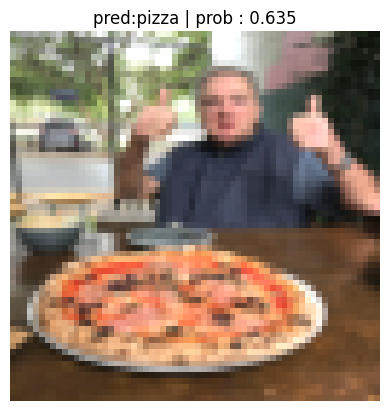

In [ ]:
pred_and_plot_image(model=model_1,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform = custom_image_transform,
                    device=device)